# Week of 12/13

#### Monday & Tuesday - Investigating NDF15 (numerical differentiation formula) evolver

Kim's dmeff and new CLASS both use NDF15 rather than Runge-Kutta, which is found in tools/evolver_rkck.c. Singular matrix is possibly getting passed to the "new_linearisation" function in evolver_ndf15.c.

Check and see if the matrix is singular, or if it has null entries, with a double nested for loop:

In [ ]:
for(ii=1;ii<=neq;ii++){
    for(jj=1;jj<=neq;jj++){
      double num = jac.LU[ii][jj];
      char output[50];
      snprintf(output,50,"%f",num);
      printf("%s",output);
    }
  }

Output looks like:

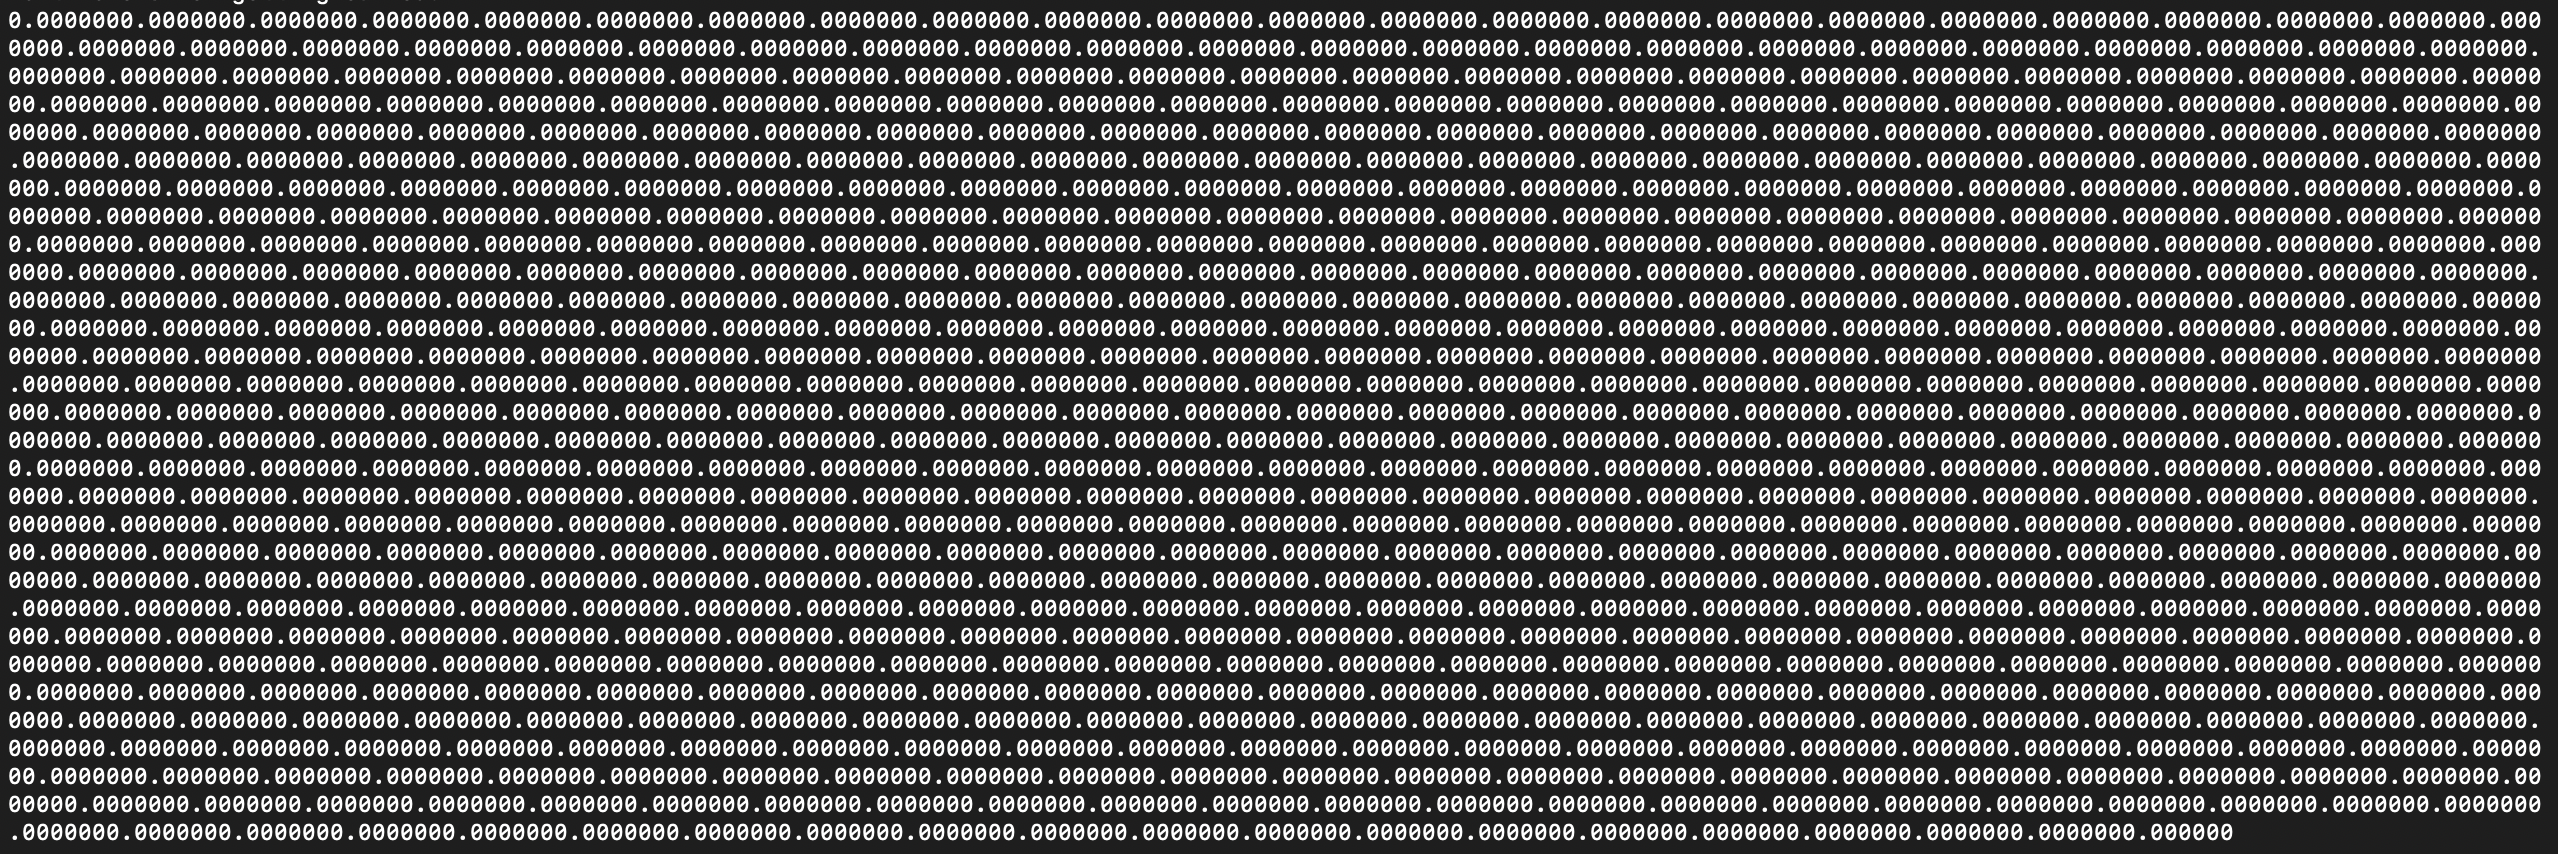

In [3]:
from IPython.display import Image, display
display(Image("/users/adamhe/research/images/Jacobian matrix.png"))

This matrix is singular. Suspect that pvecback or pvecthermo are causing this issue, since these are passed to perturbations_solve, which then throws the error. Print every entry in pvecback and pvecthermo to verify this conjecture:

In [ ]:
int size = sizeof pppw[thread]->pvecback / sizeof pppw[thread]->pvecback[0];
for(int ii=1;ii<=size;ii++){
    double num = pppw[thread]->pvecback[ii];
    char output[50];
    snprintf(output,50,"%f",num,'\n');
    printf("%s",output,'\n');
}

Output looks like:

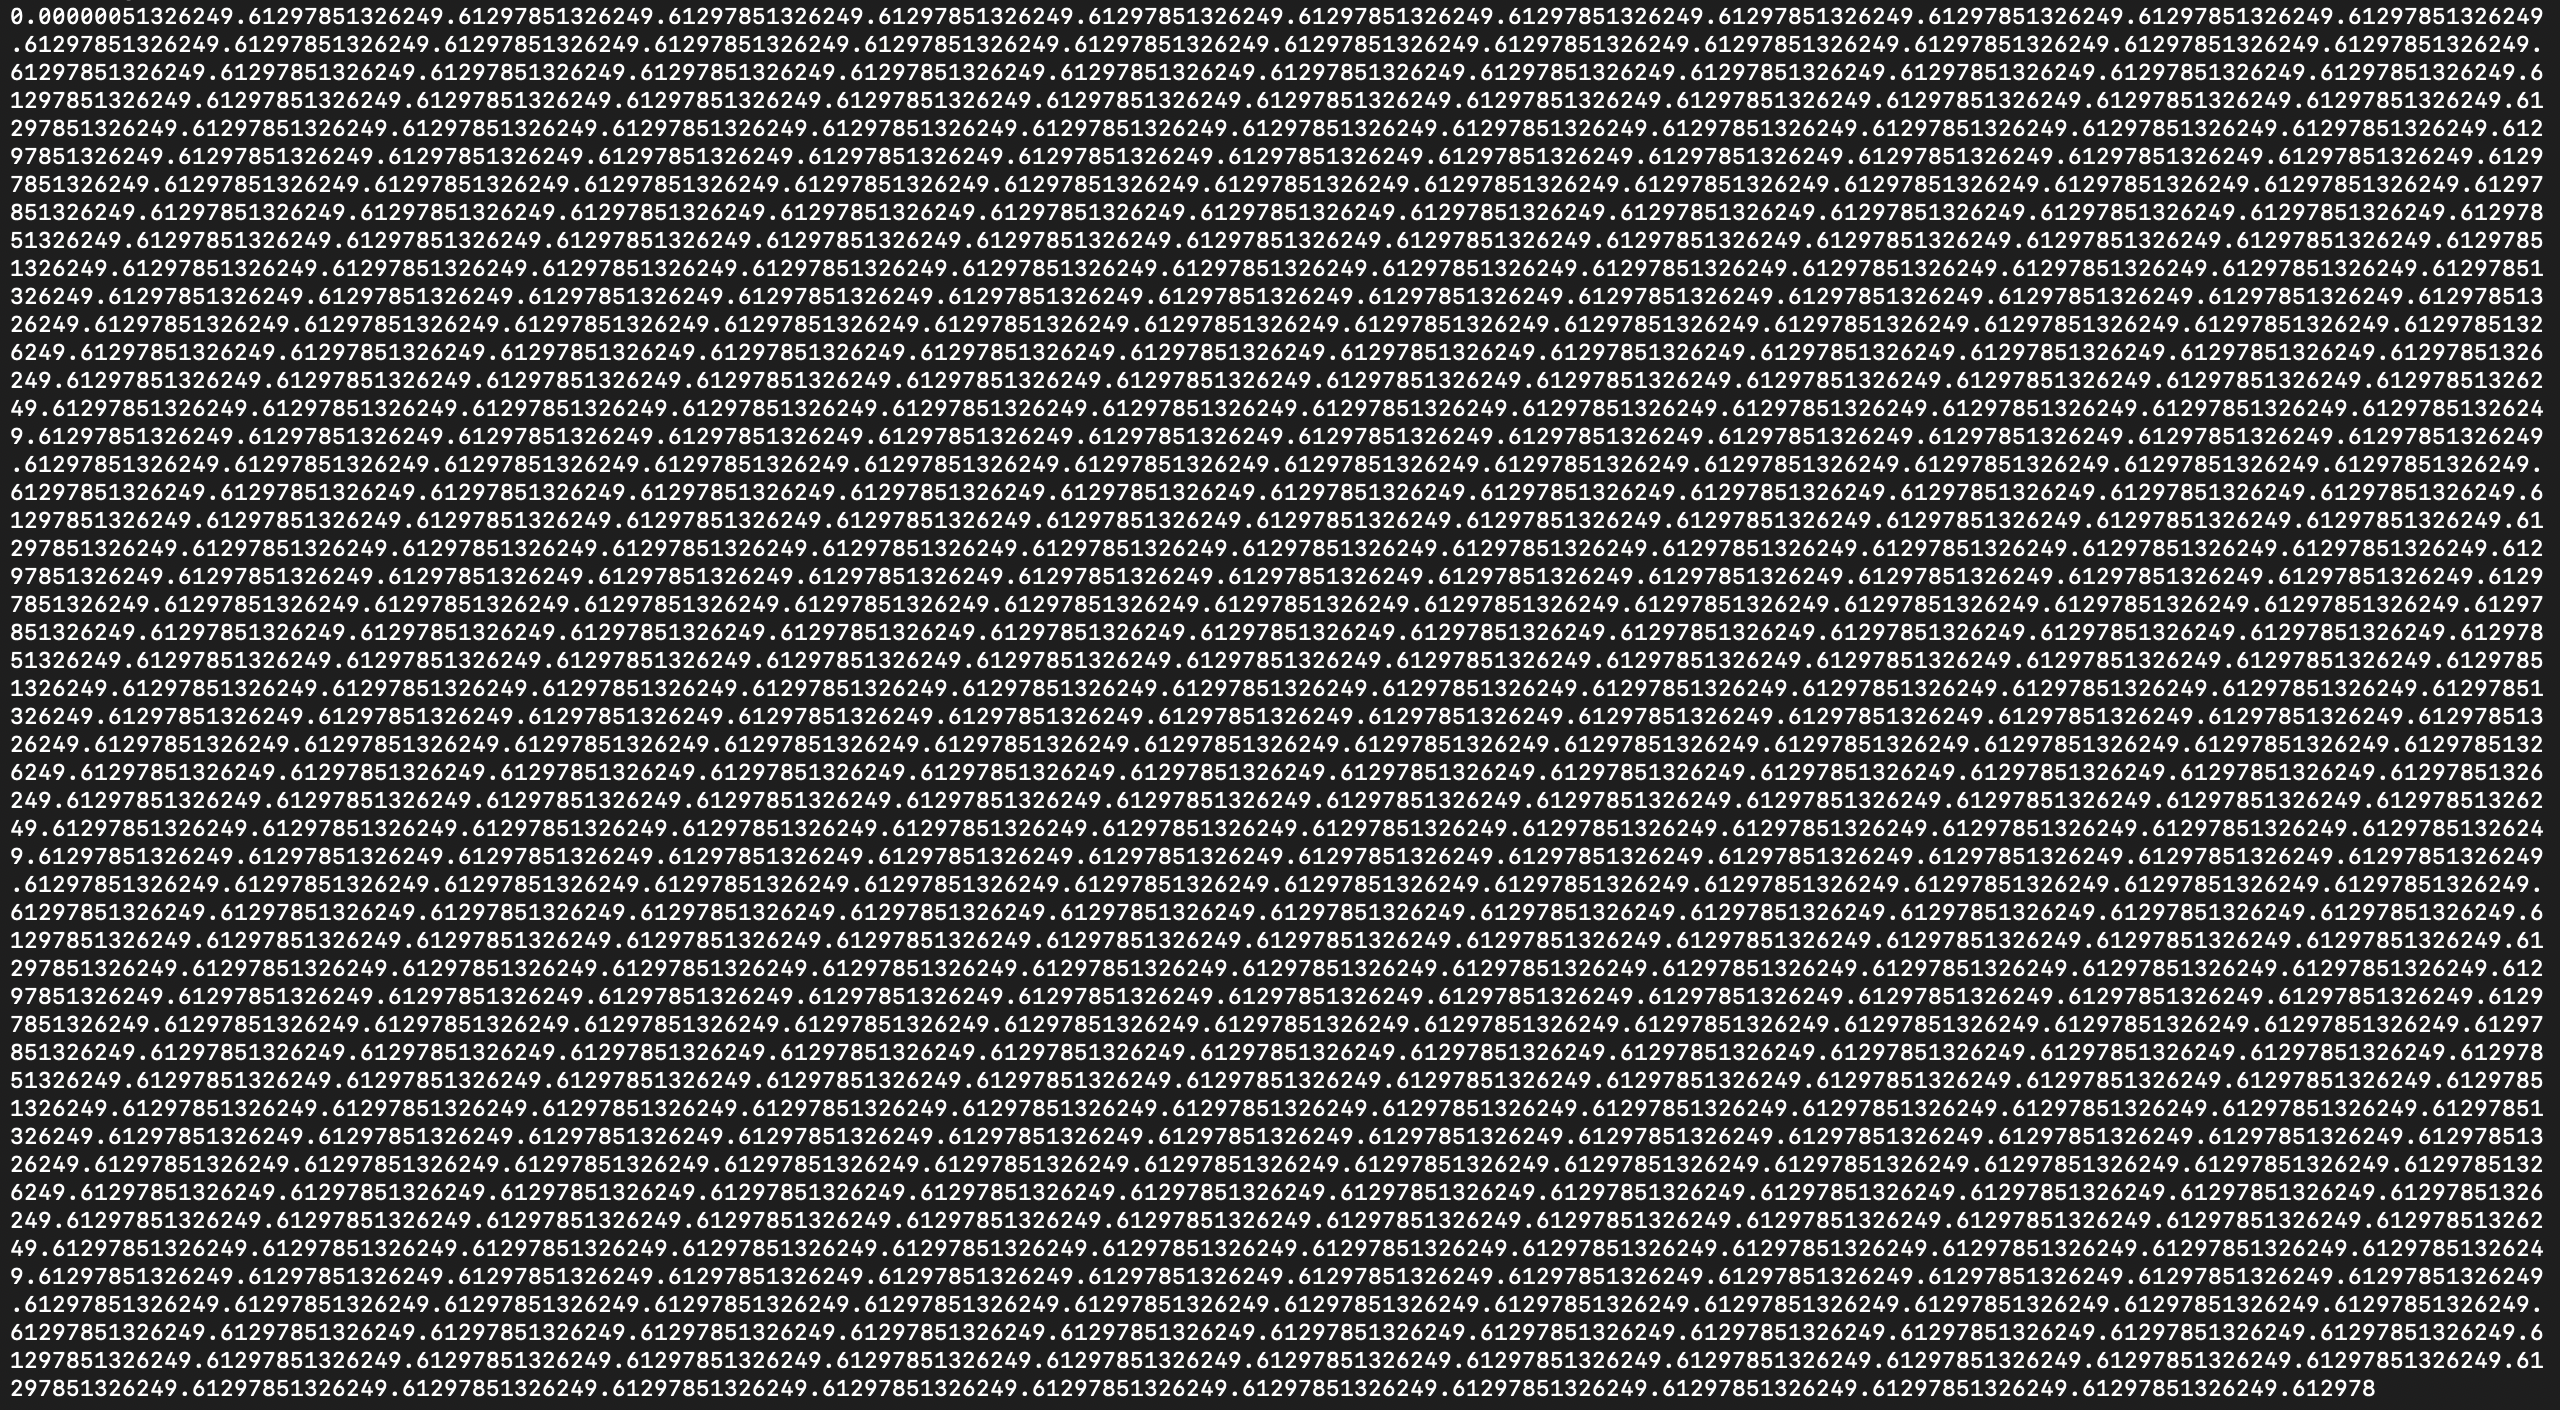

In [5]:
from IPython.display import Image, display
display(Image("/users/adamhe/research/images/pvecback.png"))

This look suspicious. Let's look into how and where pvecback is filled. Pvecback is filled in perturbations_workspace_init...

Will continue this later. Spent rest of the day verifying that this issue isn't specific to this version of CLASS (3.1.0). Incorporated dmeff edits into CLASS 3.0.2, same error thrown.

#### Wednesday - Diagnosing by plotting other variables (e.g. baryon temperature)

We've plotted TT and EE, but what about baryon temperature? Run classy and open up the background & thermo modules to look at this. 